# Introduccion a TensorFlow

In [1]:
import tensorflow as tf

In [2]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [5]:
res = tf.multiply(x1,x2)
print(res)

Tensor("Mul_2:0", shape=(5,), dtype=int32)


In [7]:
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [8]:
with tf.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [10]:
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True)

## Aprendizaje neuronal de las senales de trafico

In [45]:
import os
import skimage 
from skimage import io
import numpy as np

In [41]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
            
    return images, labels

In [42]:
main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
tast_data_dir = os.path.join(main_dir, "Testing")

In [43]:
images, labels = load_ml_data(train_data_dir)

In [44]:
len(images)

4575

In [46]:
images = np.array(images)
labels = np.array(labels)

/Library/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [47]:
images.ndim

1

In [48]:
images.size

4575

In [49]:
images[0]

array([[[ 47,  52,  59],
        [ 35,  64,  72],
        [ 53, 104, 112],
        ...,
        [ 75,  82,  60],
        [ 72,  77,  55],
        [ 68,  71,  50]],

       [[ 46,  51,  57],
        [ 38,  66,  74],
        [ 58, 109, 115],
        ...,
        [ 74,  84,  62],
        [ 76,  84,  62],
        [ 76,  83,  61]],

       [[ 44,  50,  56],
        [ 44,  71,  79],
        [ 59, 109, 115],
        ...,
        [ 71,  83,  61],
        [ 74,  84,  63],
        [ 75,  84,  63]],

       ...,

       [[120, 141, 139],
        [119, 144, 138],
        [114, 141, 131],
        ...,
        [ 33,  30,  27],
        [ 32,  30,  28],
        [ 30,  30,  28]],

       [[133, 151, 145],
        [124, 146, 138],
        [111, 137, 127],
        ...,
        [ 31,  30,  25],
        [ 32,  32,  27],
        [ 33,  33,  30]],

       [[139, 158, 147],
        [124, 146, 137],
        [107, 132, 123],
        ...,
        [ 31,  30,  23],
        [ 33,  33,  27],
        [ 35,  36,  31]]

In [50]:
labels.ndim

1

In [51]:
labels.size

4575

In [52]:
labels[0]

31

In [53]:
len(set(labels))

62

In [54]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [55]:
images.itemsize

8

In [56]:
images.nbytes

36600

In [57]:
images.nbytes/images.itemsize

4575.0

In [58]:
import matplotlib.pyplot as plt

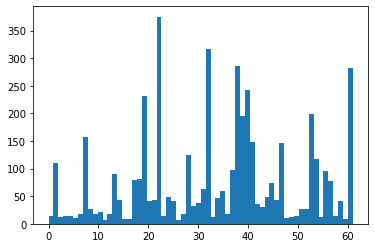

In [59]:
plt.hist(labels, len(set(labels)))
plt.show()

In [60]:
import random

In [64]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[3894, 2956, 4104, 181, 3353, 1761]

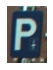

Forma:(83, 58, 3), min:6, max:255


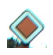

Forma:(60, 58, 3), min:0, max:255


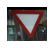

Forma:(271, 315, 3), min:0, max:243


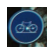

Forma:(81, 80, 3), min:0, max:255


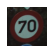

Forma:(151, 154, 3), min:4, max:161


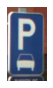

Forma:(154, 82, 3), min:17, max:255


In [68]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(images[rand_signs[i]])
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print('Forma:{0}, min:{1}, max:{2}'.format(temp_im.shape,
                                              temp_im.min(),
                                              temp_im.max()))

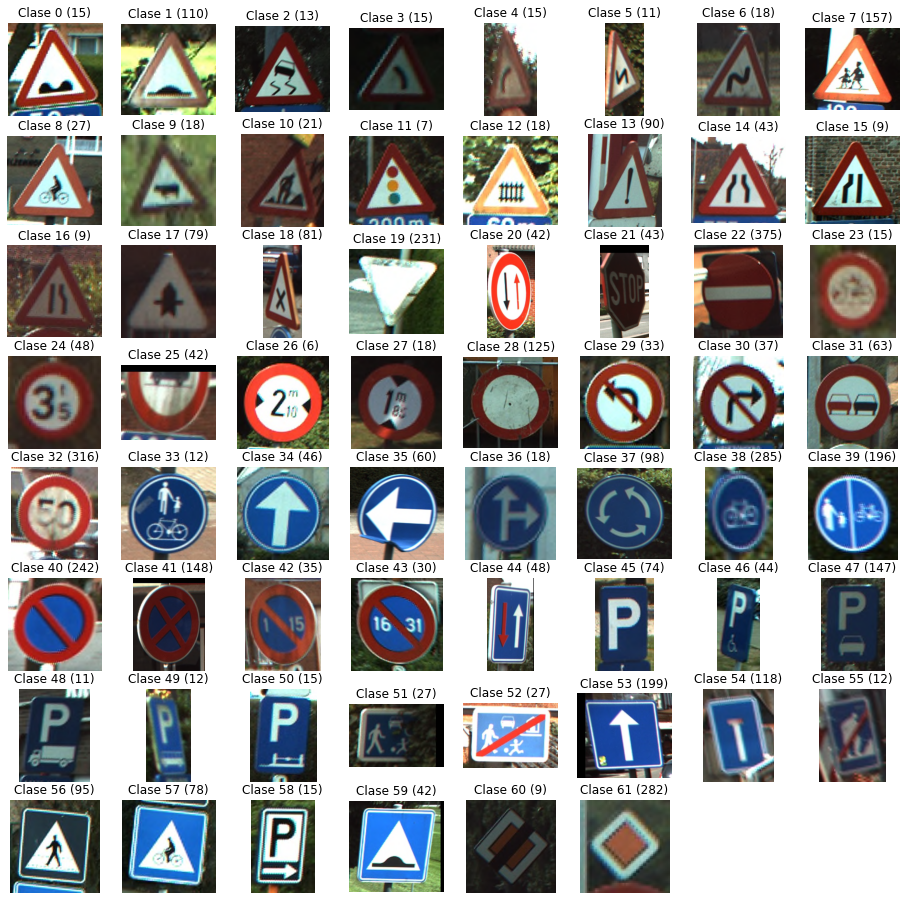

In [73]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

In [70]:
type(labels)

numpy.ndarray

## Modelo de Red Neuronal con TensorFlow

* Las imagenes no todas son del mismo tamano
* Hay 62 clases de imagenes (desde la 0 hasta la 61)
* La distribucion de senales de trafico no es uniforme (algunas salen mas veces que otras)

In [74]:
from skimage import transform

In [78]:
w = 9999
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[0]
print("Tamno minimo: {0}x{1}". format(h,w))

Tamno minimo: 22x32


In [79]:
images30 = [transform.resize(image,(30,30)) for image in images]

In [80]:
images30[0]

array([[[0.27162745, 0.40798039, 0.43156863],
        [0.43017647, 0.55527451, 0.55117647],
        [0.43343137, 0.54254902, 0.52431373],
        ...,
        [0.26235294, 0.28294118, 0.2172549 ],
        [0.24331373, 0.27588235, 0.1962549 ],
        [0.26764706, 0.30594118, 0.22058824]],

       [[0.27705882, 0.41862745, 0.43198039],
        [0.42633333, 0.55417647, 0.54470588],
        [0.43039216, 0.52441176, 0.49303922],
        ...,
        [0.30558824, 0.31647059, 0.24980392],
        [0.28098039, 0.30417647, 0.22901961],
        [0.26390196, 0.29470588, 0.21943137]],

       [[0.28823529, 0.44196078, 0.46186275],
        [0.44460784, 0.57235294, 0.55539216],
        [0.44019608, 0.52598039, 0.50245098],
        ...,
        [0.36078431, 0.32990196, 0.27058824],
        [0.34460784, 0.31019608, 0.25990196],
        [0.32862745, 0.3045098 , 0.26137255]],

       ...,

       [[0.38117647, 0.51705882, 0.50254902],
        [0.41764706, 0.5422549 , 0.51196078],
        [0.42107843, 0

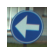

Forma:(30, 30, 3), min:0.10588235294117647, max:0.9383660130718958


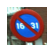

Forma:(30, 30, 3), min:0.03529411764705882, max:0.9921568627450981


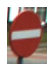

Forma:(30, 30, 3), min:0.09698257080609995, max:0.996078431372549


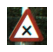

Forma:(30, 30, 3), min:0.03333333333333333, max:0.996078431372549


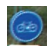

Forma:(30, 30, 3), min:0.05256209150326679, max:0.9873888888888884


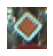

Forma:(30, 30, 3), min:0.048431372549018734, max:0.9759640522875818


In [83]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(images[rand_signs[i]])
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print('Forma:{0}, min:{1}, max:{2}'.format(temp_im.shape,
                                              temp_im.min(),
                                              temp_im.max()))

In [84]:
from skimage.color import rgb2gray

In [86]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

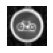

Forma:(30, 30), min:0.09581195424836587, max:0.9234263965141609


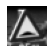

Forma:(30, 30), min:0.0657747869281046, max:0.8814960492374736


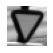

Forma:(30, 30), min:0.1727079098039217, max:0.9733621084967328


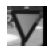

Forma:(30, 30), min:0.0, max:0.9705743790849674


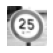

Forma:(30, 30), min:0.20904872549019637, max:0.996078431372549


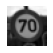

Forma:(30, 30), min:0.06585261873638341, max:0.7967957908496733


In [91]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap='gray')
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print('Forma:{0}, min:{1}, max:{2}'.format(temp_im.shape,
                                              temp_im.min(),
                                              temp_im.max()))